In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('data_science_job.csv')

In [10]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [11]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [12]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [14]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]

cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [18]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
14278,0.939,no_enrollment,Graduate,15.0,46.0
19134,0.920,Part time course,High School,12.0,13.0
904,0.890,no_enrollment,Graduate,16.0,22.0
16125,0.698,Part time course,Masters,4.0,111.0
16547,0.920,no_enrollment,Graduate,20.0,47.0


In [19]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [21]:
new_df = df[cols].dropna()

df.shape , new_df.shape 

((19158, 13), (17182, 5))

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

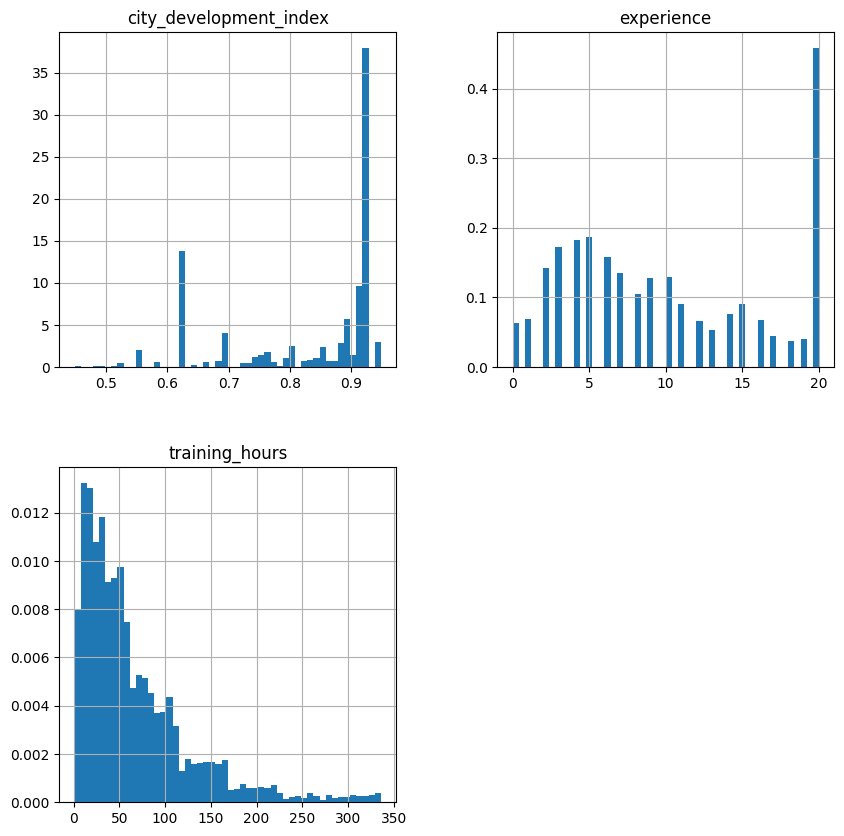

In [22]:
new_df.hist(bins=50,density = True,figsize=(10,10),)

<Axes: >

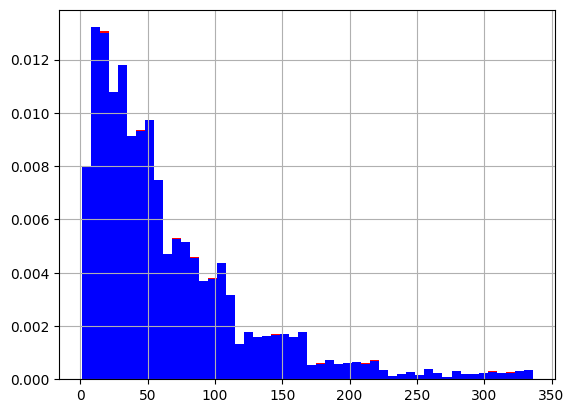

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].hist(bins=50,density = True,ax=ax,color='red')

new_df['training_hours'].hist(bins=50,density = True,ax=ax,color='blue')

<Axes: >

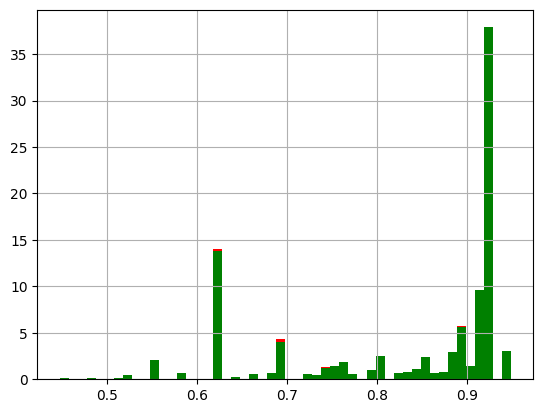

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].hist(bins=50,density = True,ax=ax,color='red')

new_df['city_development_index'].hist(bins=50,density = True,ax=ax,color='green')

<Axes: ylabel='Density'>

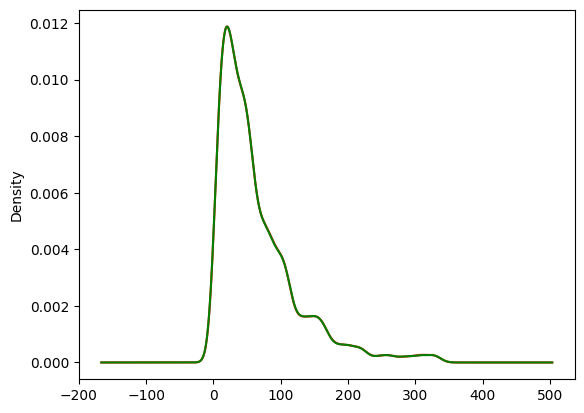

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].plot.density(color='red')

new_df['training_hours'].plot.density(color='green')

<Axes: ylabel='Density'>

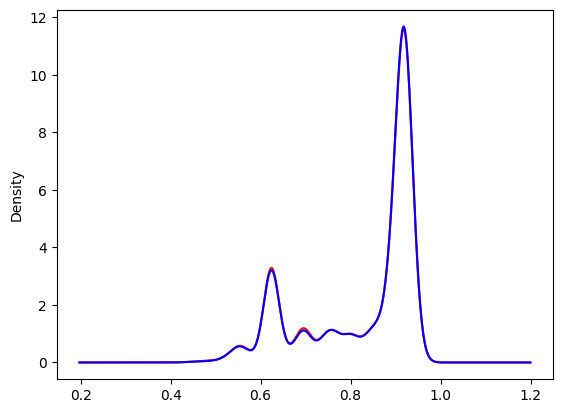

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].plot.density(color='red')

new_df['city_development_index'].plot.density(color='blue')

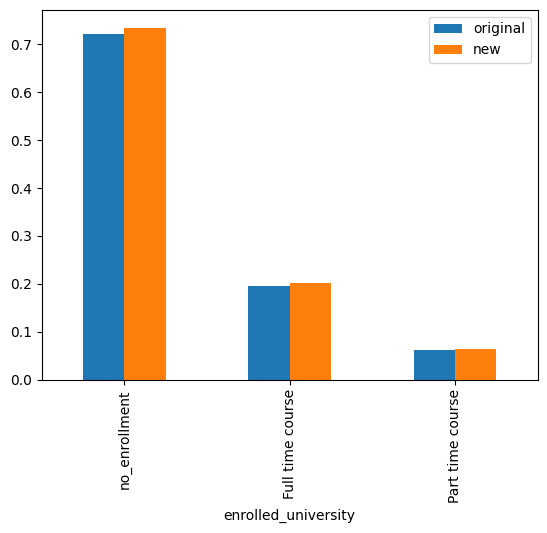

In [38]:
## applying CCA

temp = pd.concat([
    df['enrolled_university'].value_counts()/len(df),
    
    new_df['enrolled_university'].value_counts()/len(new_df)
],axis=1)

temp.columns = ['original','new']

# temp
temp_plot = temp.plot.bar()

In [37]:
## applying CCA on Educational_level

temp = pd.concat([
    df['education_level'].value_counts()/len(df),
    
    new_df['education_level'].value_counts()/len(new_df)
],axis=1)

temp.columns = ['original','new']

temp

,original,new
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
